[dataset NY] https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc

## 1- Importando a base de dados

In [1]:
#  Importando as bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date

 - Link do site onde encontra-se o dataset
 
 url:https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc

In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
# visualizando as 5 primeiras linhas do dataset
df[0:5]

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,222243929,12/25/2020,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,40,0,25-44,M,BLACK,1007453,233952,40.808798,-73.916184,POINT (-73.91618413199996 40.80879780500004)
1,222115778,12/22/2020,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,33,0,18-24,M,BLACK HISPANIC,1001456,247485,40.845956,-73.937813,POINT (-73.93781267199995 40.84595574000008)
2,222090516,12/21/2020,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,106,0,25-44,M,BLACK,1028605,187930,40.682398,-73.840079,POINT (-73.84007936899997 40.68239828900005)
3,221653577,12/10/2020,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,103,0,18-24,M,BLACK,1039602,190480,40.689336,-73.800409,POINT (-73.80040882999998 40.68933550400004)
4,221599602,12/09/2020,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,S,120,0,18-24,M,BLACK,949767,170539,40.634708,-74.124241,POINT (-74.12424111699994 40.634707811000055)


## 2- Preparaçao dos dados


 - Removendo as colunas que nao serão utilizadas 

In [4]:
select_ny=df.drop(['ARREST_KEY', 'PD_CD', 'PD_DESC', 'KY_CD', 'LAW_CODE','ARREST_PRECINCT', 'JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD','New Georeferenced Column'], axis=1)

In [5]:
#  Renomeando as colunas

select_ny.columns = ['data_da_ocorrencia','descricao_da_ofensa','nivel_da_ofensa','bairro'
                     ,'idade_do_infrator','sexo_do_infrator','raca_do_infrator','latitude','longitude']

In [6]:
# reorganizando os dados referentes a data 

def date_to_weekday(date):
    weekday_dict = {0:'Monday', 1:'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
    date_time_obj = datetime.datetime.strptime(date, '%m/%d/%Y')
    return weekday_dict[date_time_obj.weekday()]

date = select_ny['data_da_ocorrencia'].str.split("/", n = 3, expand = True)
select_ny['ano'] = date[2].astype('int32')
select_ny['dia'] = date[1].astype('int32')
select_ny['mes'] = date[0].astype('int32')
select_ny['dia_da_semana'] = select_ny['data_da_ocorrencia'].apply(date_to_weekday)

# alterando os dados da coluna nivel_da_ofensa

new_nivel_da_ofensa = {'M': "contravencao", 'F': "crime", 'V': "violacao",'I':"outro" }
select_ny['nivel_da_ofensa'] = select_ny['nivel_da_ofensa'].map(new_nivel_da_ofensa)

# alterando os dados da coluna bairro

new_bairro = {'B': 'Bronx', 'S': 'Staten_Island', 'K': 'Brooklyn', 'M': 'Manhattan' , 'Q': 'Queens' }
select_ny['bairro'] = select_ny['bairro'].map(new_bairro)

In [7]:
select_ny.head()

,data_da_ocorrencia,descricao_da_ofensa,nivel_da_ofensa,bairro,idade_do_infrator,sexo_do_infrator,raca_do_infrator,latitude,longitude,ano,dia,mes,dia_da_semana
0,12/25/2020,FELONY ASSAULT,crime,Bronx,25-44,M,BLACK,40.808798,-73.916184,2020,25,12,Friday
1,12/22/2020,ROBBERY,crime,Manhattan,18-24,M,BLACK HISPANIC,40.845956,-73.937813,2020,22,12,Tuesday
2,12/21/2020,FELONY ASSAULT,crime,Queens,25-44,M,BLACK,40.682398,-73.840079,2020,21,12,Monday
3,12/10/2020,FELONY ASSAULT,crime,Queens,18-24,M,BLACK,40.689336,-73.800409,2020,10,12,Thursday
4,12/09/2020,FORGERY,crime,Staten_Island,18-24,M,BLACK,40.634708,-74.124241,2020,9,12,Wednesday


In [8]:
select_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140413 entries, 0 to 140412
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   data_da_ocorrencia   140413 non-null  object 
 1   descricao_da_ofensa  140376 non-null  object 
 2   nivel_da_ofensa      139024 non-null  object 
 3   bairro               140413 non-null  object 
 4   idade_do_infrator    140413 non-null  object 
 5   sexo_do_infrator     140413 non-null  object 
 6   raca_do_infrator     140413 non-null  object 
 7   latitude             140413 non-null  float64
 8   longitude            140413 non-null  float64
 9   ano                  140413 non-null  int32  
 10  dia                  140413 non-null  int32  
 11  mes                  140413 non-null  int32  
 12  dia_da_semana        140413 non-null  object 
dtypes: float64(2), int32(3), object(8)
memory usage: 12.3+ MB


In [9]:
select_ny.shape

(140413, 13)

 - Convertendo a coluna " DATA_DA_OCORRENCIA "para formato datetime

In [10]:
select_ny["data_da_ocorrencia"] = pd.to_datetime(select_ny["data_da_ocorrencia"] )

## 3.0  Gerando algumas vizualizações de select_ny 

### 3.1- Quantidade de delitos cometidos por bairros
 
 - Será criado um DataFrame delitos_concluidos_por_bairros que será utilizado neste tópico
 - Selecionando apenas os delitos concluídos

 - Criando o DataFrame delitos_concluidos_por_bairros

In [11]:
delitos_concluidos_por_bairros_df = select_ny.bairro.value_counts().to_frame().reset_index()
delitos_concluidos_por_bairros_df.columns = ['bairro' , 'qtde_delitos']

In [12]:
delitos_concluidos_por_bairros_df

,bairro,qtde_delitos
0,Brooklyn,38258
1,Manhattan,33255
2,Bronx,32724
3,Queens,29981
4,Staten_Island,6195


- Visualizando a quantidade de delitos em cada bairro

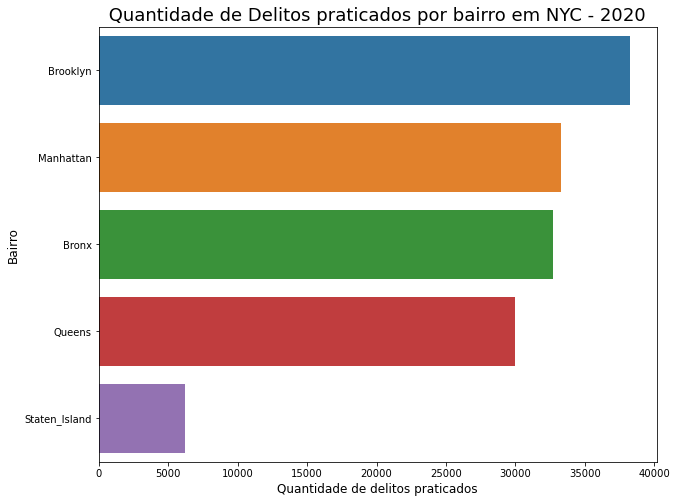

In [13]:
plt.figure(figsize = (10,8))
sns.barplot(y = 'bairro' , x = 'qtde_delitos' , data = delitos_concluidos_por_bairros_df)
titulo = ' Quantidade de Delitos praticados por bairro em NYC - 2020 '
plt.xlabel('Quantidade de delitos praticados', fontsize = 12)
plt.ylabel('Bairro', fontsize = 12)
plt.title(titulo, fontsize = 18)
plt.show()

 - Distribuição dos delitos cometidos de acordo com o dia do mes

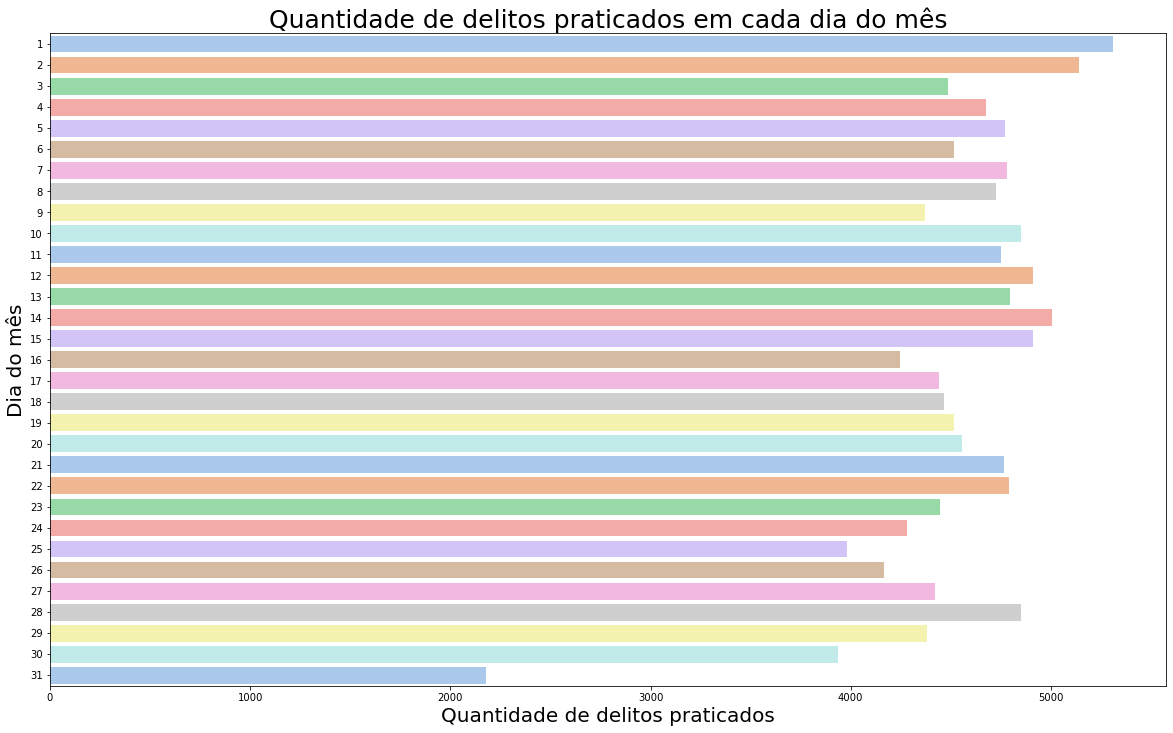

In [14]:
f, ax = plt.subplots(figsize=(20, 12))
sns.countplot(y="dia", data=select_ny,palette="pastel" );
plt.xlabel('Quantidade de delitos praticados', fontsize = 20)
plt.ylabel('Dia do mês', fontsize = 20)
plt.title('Quantidade de delitos praticados em cada dia do mês', fontsize = 25)
plt.show()

 - Distribuição dos delitos por mes

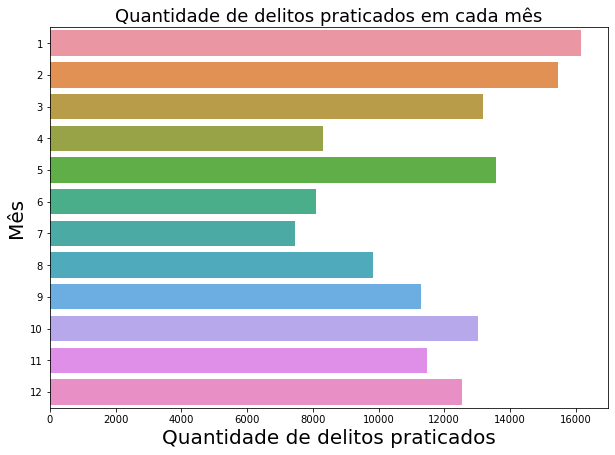

In [15]:
f, ax = plt.subplots(figsize=(10, 7))
sns.countplot(y="mes", data=select_ny)
titulo='Quantidade de delitos praticados em cada mês'
plt.title(titulo, fontsize=18)
plt.xlabel('Quantidade de delitos praticados', fontsize = 20)
plt.ylabel('Mês', fontsize = 20)
plt.show()

### 3.2- Descrição da ofensa :  tipos de delitos mais comuns

In [16]:
tipos_de_delitos = select_ny.descricao_da_ofensa.value_counts().to_frame().reset_index()
tipos_de_delitos.columns = ['descricao_da_ofensa' , 'quantidade']

 - Visualizando os tipos de delitos mais recorrentes

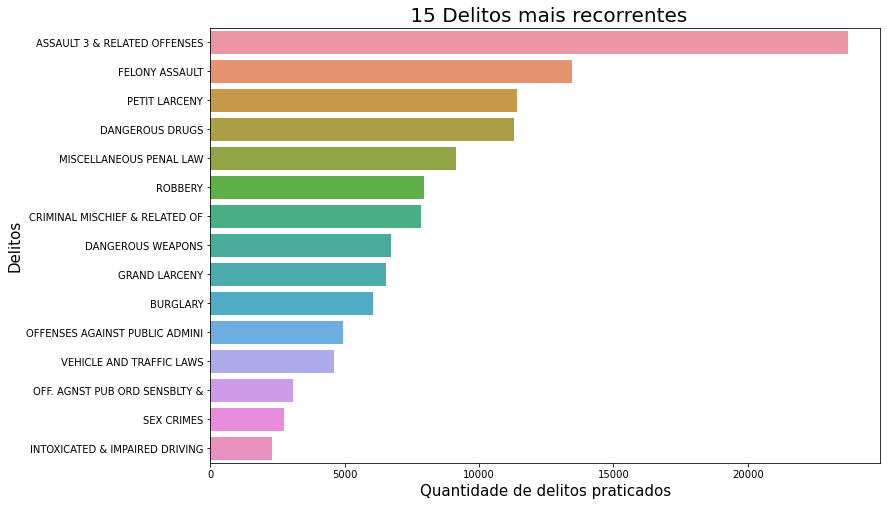

In [17]:
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(y = 'descricao_da_ofensa' , x = 'quantidade' , data = tipos_de_delitos.head(15))
titulo=' 15 Delitos mais recorrentes'
plt.title(titulo, fontsize=20)
plt.xlabel('Quantidade de delitos praticados', fontsize = 15)
plt.ylabel('Delitos', fontsize = 15)
plt.show()

###  3.3- Visualizando a distribuicao do sexo e raça dos infratores 

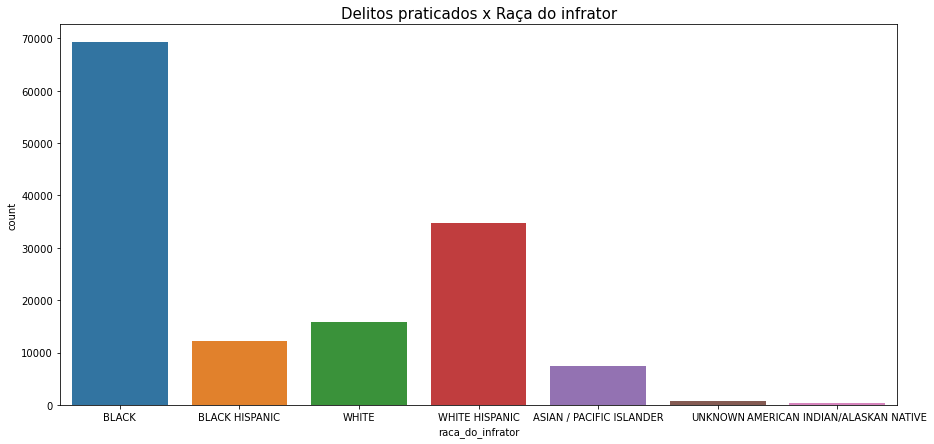

In [18]:
f, ax = plt.subplots(figsize=(15, 7))
sns.countplot( x ="raca_do_infrator", data=select_ny)
titulo ='Delitos praticados x Raça do infrator'
plt.title(titulo, fontsize=15)
plt.show()

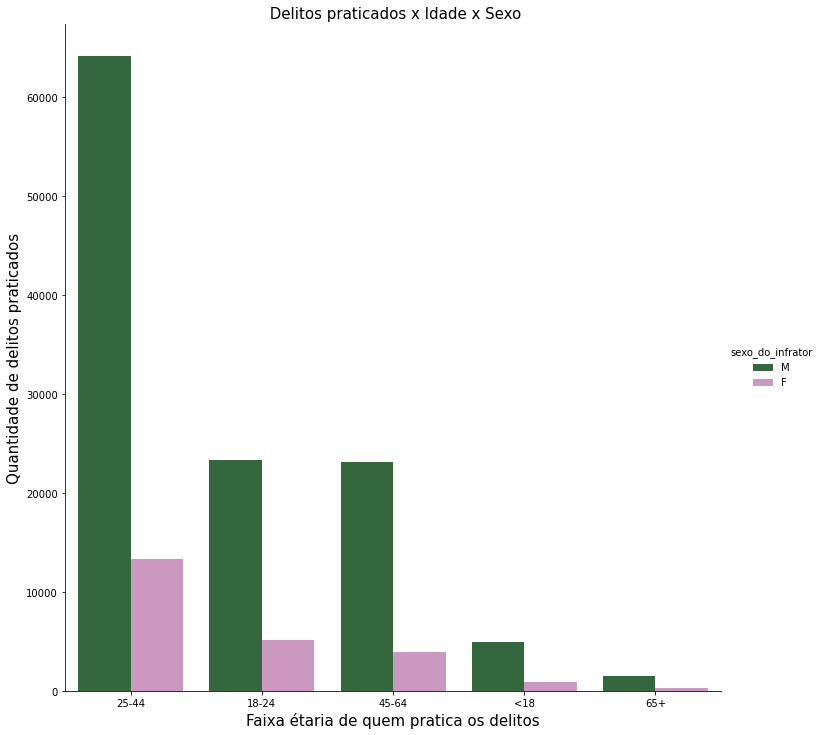

In [19]:
ax = sns.catplot(x="idade_do_infrator", hue="sexo_do_infrator", kind="count",palette="cubehelix", data=select_ny, height=10, aspect=1)
plt.xlabel('Faixa étaria de quem pratica os delitos' , fontsize=15)
plt.ylabel('Quantidade de delitos praticados' , fontsize=15)
titulo =" Delitos praticados x Idade x Sexo"
plt.title(titulo, fontsize=15)
plt.show()

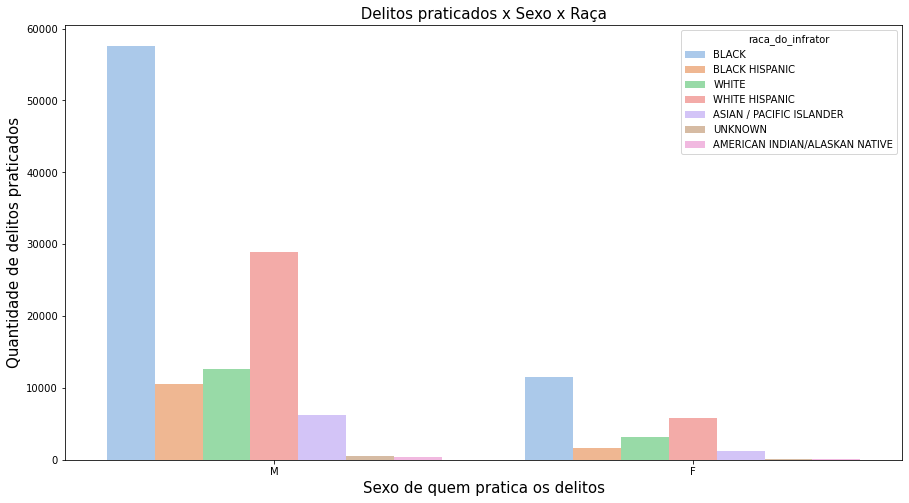

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(x="sexo_do_infrator", hue="raca_do_infrator", data=select_ny, palette="pastel")
plt.xlabel('Sexo de quem pratica os delitos' , fontsize=15)
plt.ylabel('Quantidade de delitos praticados' , fontsize=15)
titulo =" Delitos praticados x Sexo x Raça "
plt.title(titulo, fontsize=15)
plt.show()

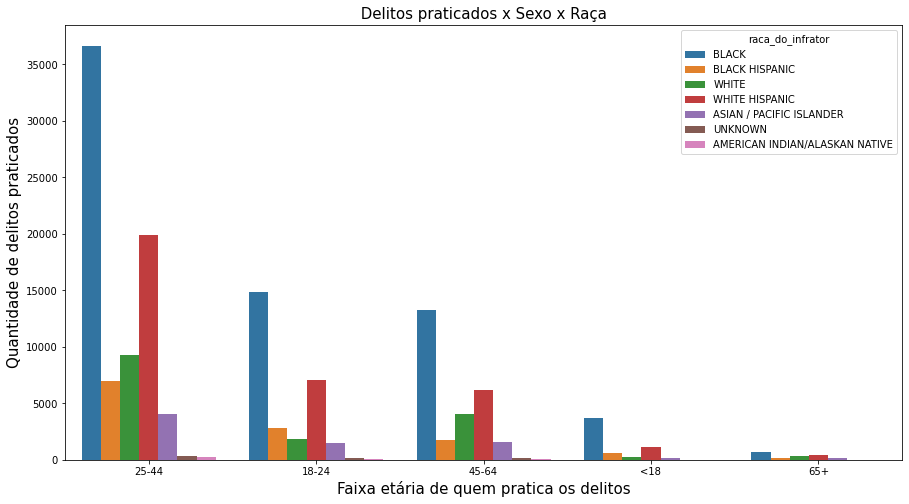

In [21]:
plt.figure(figsize=(15,8))
sns.countplot(x='idade_do_infrator', hue='raca_do_infrator', data = select_ny)
plt.xlabel('Faixa etária de quem pratica os delitos' , fontsize=15)
plt.ylabel('Quantidade de delitos praticados' , fontsize=15)
titulo =" Delitos praticados x Sexo x Raça "
plt.title(titulo, fontsize=15)
plt.show()

 ### Selecinando apenas os crimes com maiores incidencias.
 
  - Baseado no DataFrame criado anteriormente "tipos_de_delitos" , selecinamos os 15 tipos mais recorrentes.

In [27]:
delitos_frequentes = select_ny.query('descricao_da_ofensa =="ASSAULT 3 & RELATED OFFENSES" or  descricao_da_ofensa =="FELONY ASSAULT" or descricao_da_ofensa =="PETIT LARCENY" or descricao_da_ofensa =="DANGEROUS DRUGS" or descricao_da_ofensa =="MISCELLANEOUS PENAL LAW" or descricao_da_ofensa =="ROBBERY" or descricao_da_ofensa =="CRIMINAL MISCHIEF & RELATED OF" or descricao_da_ofensa =="BURGLARY" or  descricao_da_ofensa =="GRAND LARCENY" or descricao_da_ofensa =="DANGEROUS WEAPONS" or  descricao_da_ofensa =="OFFENSES AGAINST PUBLIC ADMINI" or descricao_da_ofensa =="VEHICLE AND TRAFFIC LAWS" or  descricao_da_ofensa =="OFF. AGNST PUB ORD SENSBLTY &" or descricao_da_ofensa =="SEX CRIMES" or descricao_da_ofensa =="INTOXICATED & IMPAIRED DRIVING"  ')

In [28]:
delitos_frequentes = delitos_frequentes.dropna()

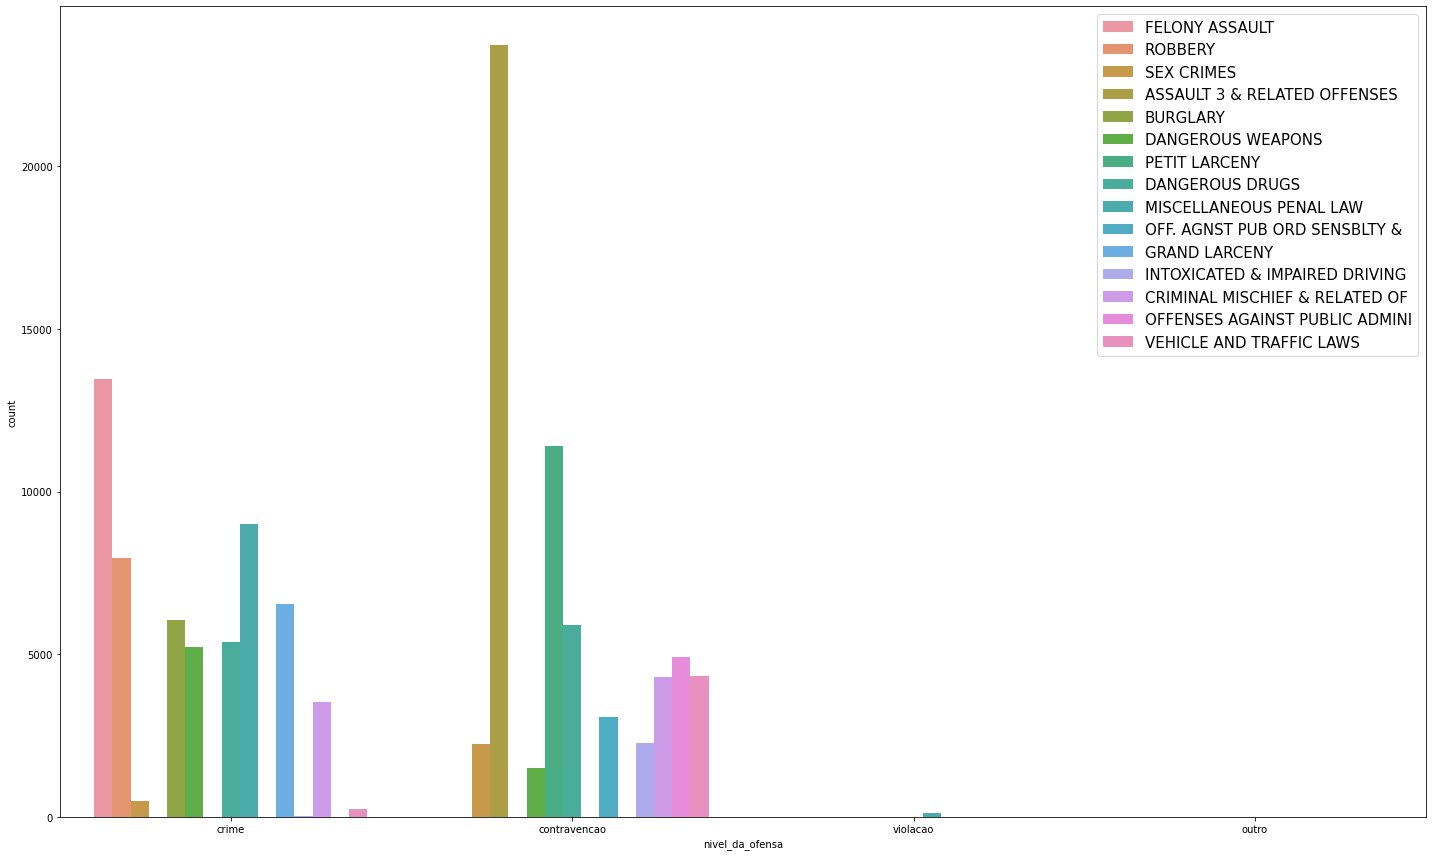

In [29]:
plt.figure(figsize=(20,12))
sns.countplot(x='nivel_da_ofensa' , hue='descricao_da_ofensa' , data = delitos_frequentes)
plt.legend(fontsize=15,loc=1)
plt.tight_layout()
plt.show()

 Criando um novo rquivo csv pre-processado.

In [30]:
select_ny.to_csv('dados_pre_processados.csv', index =False , encoding = 'utf-8')

In [31]:
df = pd.read_csv('dados_pre_processados.csv')

In [32]:
df.head()

,data_da_ocorrencia,descricao_da_ofensa,nivel_da_ofensa,bairro,idade_do_infrator,sexo_do_infrator,raca_do_infrator,latitude,longitude,ano,dia,mes,dia_da_semana
0,2020-12-25,FELONY ASSAULT,crime,Bronx,25-44,M,BLACK,40.808798,-73.916184,2020,25,12,Friday
1,2020-12-22,ROBBERY,crime,Manhattan,18-24,M,BLACK HISPANIC,40.845956,-73.937813,2020,22,12,Tuesday
2,2020-12-21,FELONY ASSAULT,crime,Queens,25-44,M,BLACK,40.682398,-73.840079,2020,21,12,Monday
3,2020-12-10,FELONY ASSAULT,crime,Queens,18-24,M,BLACK,40.689336,-73.800409,2020,10,12,Thursday
4,2020-12-09,FORGERY,crime,Staten_Island,18-24,M,BLACK,40.634708,-74.124241,2020,9,12,Wednesday


In [33]:
select_ny.shape

(140413, 13)

In [34]:
df.shape

(140413, 13)